# Regressão Logística

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Dados de funcionários, relacionando idade e salários, para depois identificar os grupos

In [3]:
# Idades
x = [21, 23, 27, 32, 34, 41, 50, 53, 57, 59, 38, 46, 48, 48, 60]

# Salarios
y = [1000, 1100, 1250, 1700, 1500, 1980, 2500, 3500, 2200, 4100, 3900, 5100, 5500, 7000, 6500]

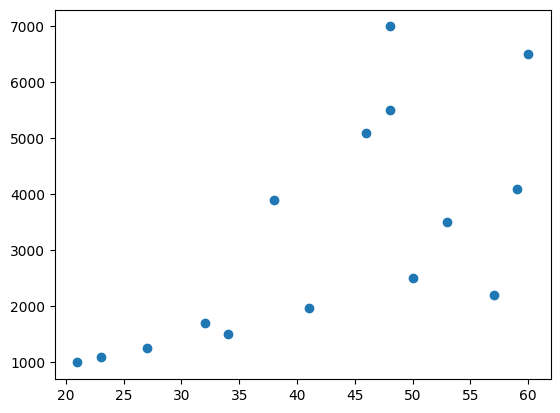

In [4]:
plt.scatter(x,y)

In [5]:
base_salario = np.array([
  [21,1000],
  [23,1100],
  [27,1250],
  [32,1700],
  [34,1500],
  [41,1980],
  [38,3900],
  [46,5100],
  [46,5500],
  [48,7000],
  [53,3500],
  [57,2200],
  [59,4100],
  [60,6500],
  [50,2500]
])

Uma vez que ha a diferenca de escalas entre a idade e o salario, é preciso que façamos a normalização dos dados

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
base_salario = scaler.fit_transform(base_salario)
base_salario

array([[-1.72382169, -1.15955852],
       [-1.56221341, -1.10814445],
       [-1.23899684, -1.03102336],
       [-0.83497613, -0.79966007],
       [-0.67336785, -0.9024882 ],
       [-0.10773886, -0.65570069],
       [-0.35015128,  0.33144933],
       [ 0.29628185,  0.9484181 ],
       [ 0.29628185,  1.15407435],
       [ 0.45789014,  1.92528531],
       [ 0.86191085,  0.12579308],
       [ 1.18512741, -0.54258975],
       [ 1.3467357 ,  0.43427746],
       [ 1.42753984,  1.66821499],
       [ 0.61949842, -0.38834756]])

Treinando o modelo

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

/home/phllp/dev/bootcamp_python/modulo_04/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
centroide = kmeans_salario.cluster_centers_
centroide

array([[ 0.73262422, -0.00788349],
       [-1.02351913, -0.94276255],
       [ 0.61949842,  1.42399818]])

In [11]:
scaler.inverse_transform(kmeans_salario.cluster_centers_)

array([[  51.4       , 3240.        ],
       [  29.66666667, 1421.66666667],
       [  50.        , 6025.        ]])

In [12]:
rotulos = kmeans_salario.labels_
rotulos

array([1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0], dtype=int32)

In [16]:
import plotly.express as px
import plotly.graph_objects as go

g1 = px.scatter(x=base_salario[:,0], y=base_salario[:,1], color=rotulos)
g2 = px.scatter(x=centroide[:,0], y=centroide[:,1], size=[8,8,8])
g3 = go.Figure(data=g1.data + g2.data)

g3.show()